<a href="https://colab.research.google.com/github/samreed83/Analysis_Projects/blob/main/Supermarket_Sales_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/data/main/Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [95]:
df.isnull().sum()

,0
Store ID,0
Store_Area,0
Items_Available,0
Daily_Customer_Count,0
Store_Sales,0


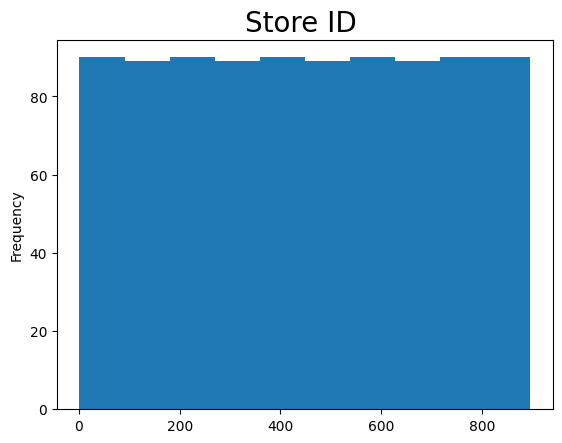

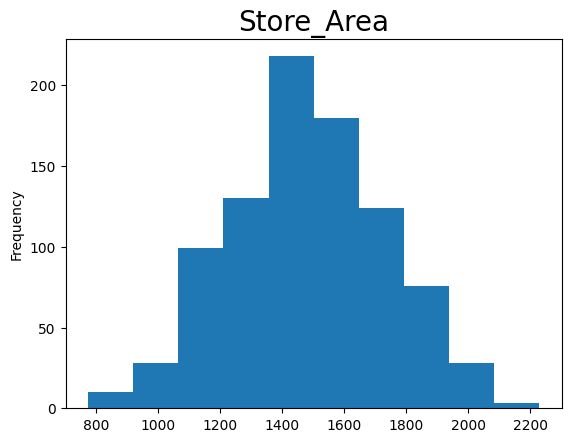

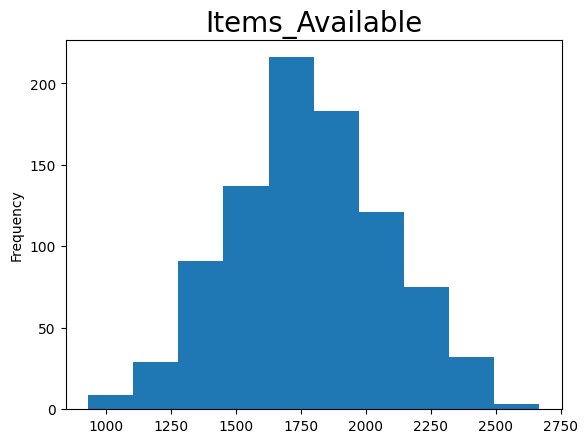

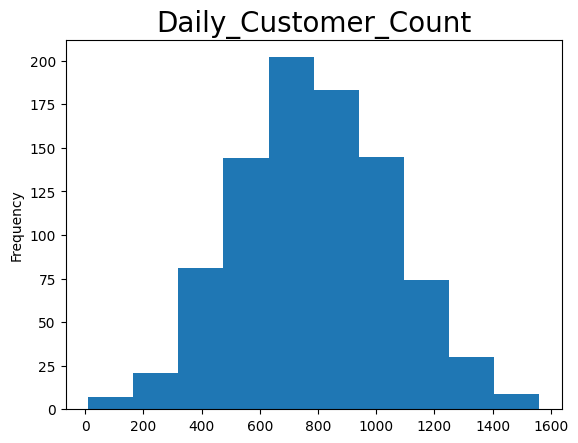

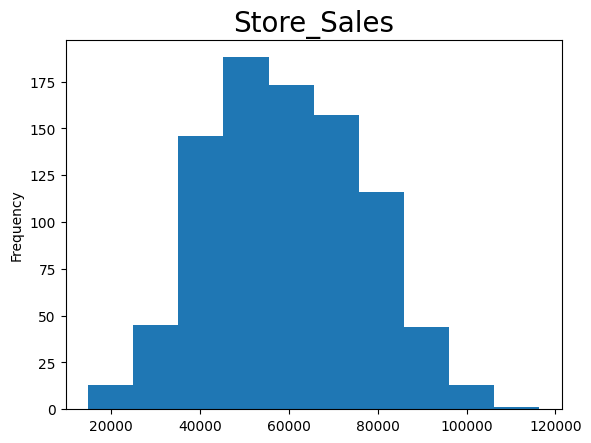

In [123]:
for feat in df.columns:
  if df[feat].dtype == 'object':
    df[feat].value_counts().plot(kind='bar')
  else:
    df[feat].plot(kind='hist')
  plt.title (feat, fontsize=20)
  plt.show()

<Axes: title={'center': 'Store_Area'}, ylabel='Frequency'>

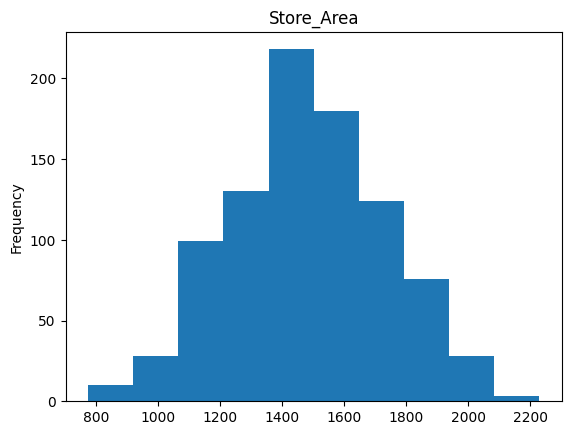

In [124]:
df['Store_Area'].plot(kind ='hist', title='Store_Area')

In [125]:
def area_binner(x):
  if x > 1800:
    value = 'large'
  elif x < 1200:
    value = 'small'
  else:
    value = 'medium'
  return value

<Axes: xlabel='Store_Size'>

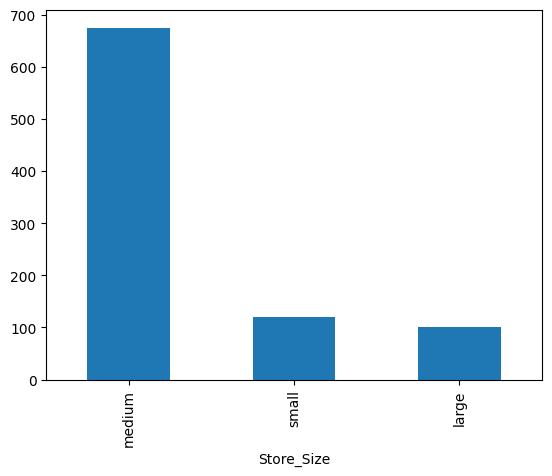

In [126]:
df['Store_Size'] = df['Store_Area'].apply(area_binner)
df['Store_Size'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Average Sale per Store Size'}, xlabel='Store_Size'>

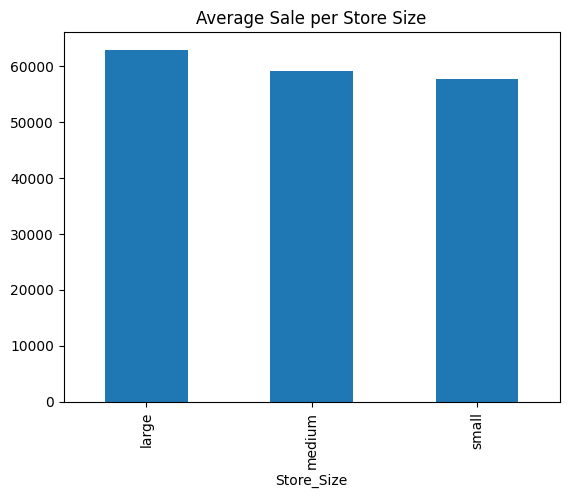

In [127]:
df.groupby('Store_Size')['Store_Sales'].mean().plot (kind='bar', title='Average Sale per Store Size')

<Axes: title={'center': 'Total Sales per Store Size'}, xlabel='Store_Size'>

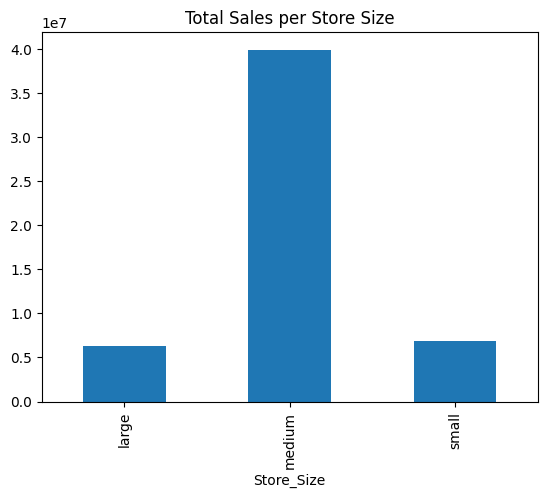

In [128]:
df.groupby('Store_Size')['Store_Sales'].sum().plot(kind='bar', title='Total Sales per Store Size')

<ipython-input-129-9a7adce1a21d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = x[1] / x[0]


<Axes: ylabel='Frequency'>

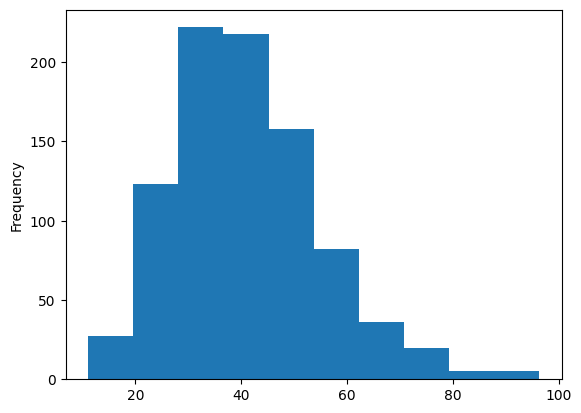

In [129]:
def sales_per_sqfoot(x):
  value = x[1] / x[0]
  return value

df['sales_per_sqfoot'] = df[['Store_Area', 'Store_Sales']].apply(sales_per_sqfoot, axis =1)
df['sales_per_sqfoot'].plot(kind='hist')

<Axes: title={'center': 'Average Sale per Store Size'}, xlabel='Store_Size'>

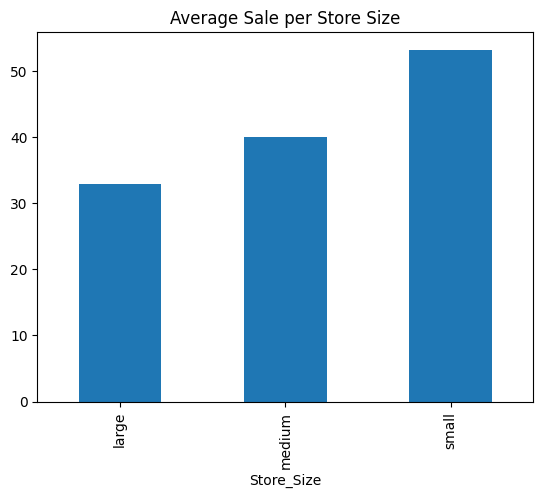

In [130]:
df.groupby('Store_Size')['sales_per_sqfoot'].mean().plot(kind='bar', title='Average Sale per Store Size')

Observations


*  small stores are very efficient while large stores are inefficient
* small stores have the highest sales per sq foot



In [131]:
def sales_per_csutomer(x):
  value = x[1] / x[0]
  return value

In [132]:
df['sales_per_csutomer'] = df[['Daily_Customer_Count', 'Store_Sales']].apply (sales_per_sqfoot, axis =1)

<ipython-input-129-9a7adce1a21d>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = x[1] / x[0]


<Axes: xlabel='Store_Size'>

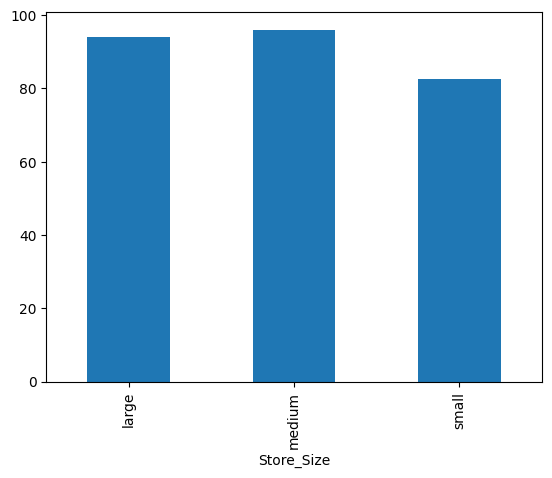

In [133]:
df.groupby('Store_Size')['sales_per_csutomer'].mean().plot(kind='bar')

In [134]:
def traffic_per_sqfoot(x):
  value = x[1] / x[0]
  return value

In [135]:
df['traffic_per_sqfoot'] = df[['Daily_Customer_Count', 'Store_Area']].apply(sales_per_csutomer, axis=1)

<ipython-input-131-e59f2bdc1af2>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = x[1] / x[0]


<Axes: xlabel='Store_Size'>

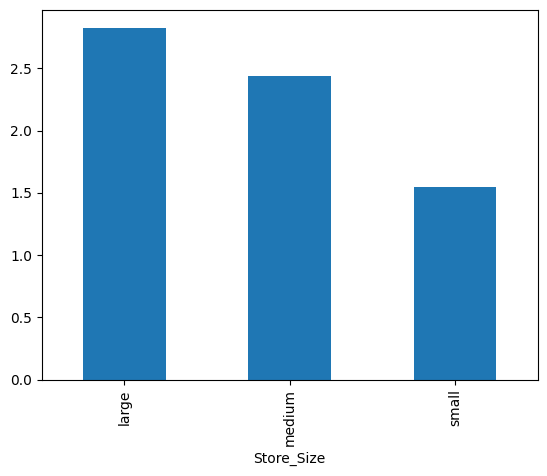

In [136]:
df.groupby('Store_Size')['traffic_per_sqfoot'].mean().plot(kind='bar')

In [110]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales', 'Store_Size', 'sales_per_sqfoot', 'sales_per_csutomer',
       'traffic_per_sqfoot'],
      dtype='object')

In [137]:
no_features = ['Store ID ','Store_Size']

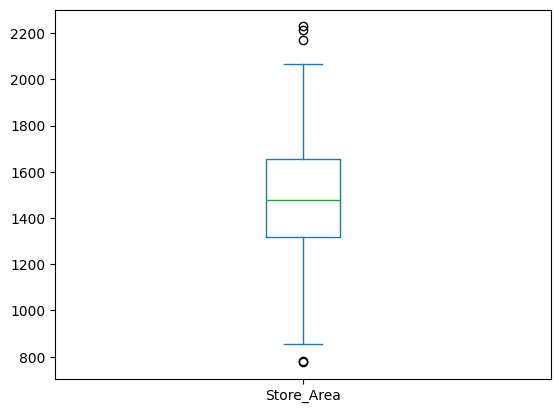

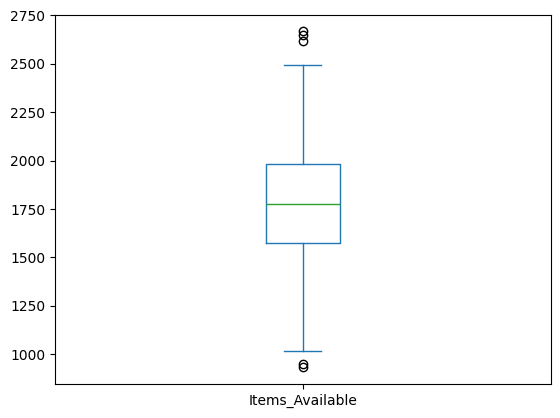

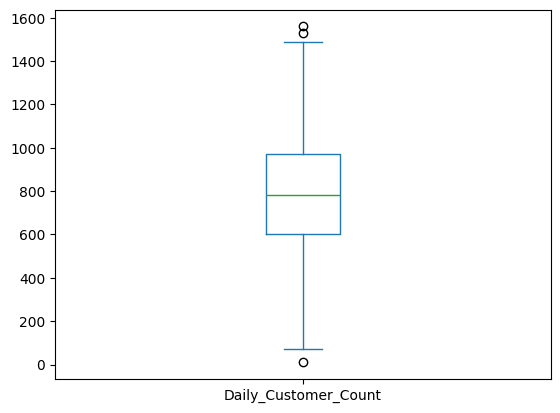

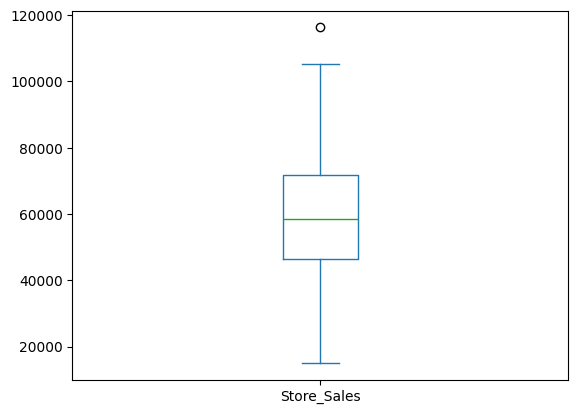

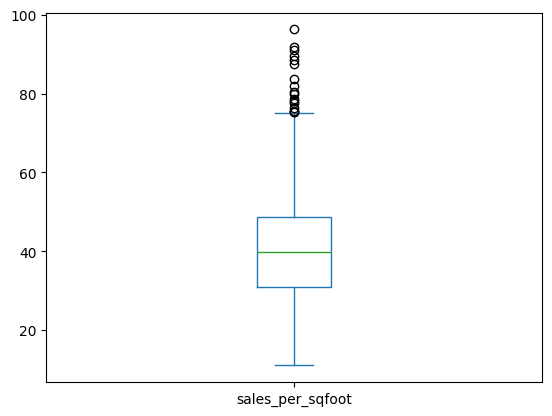

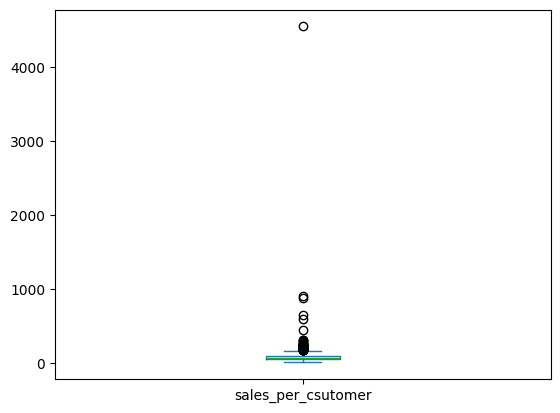

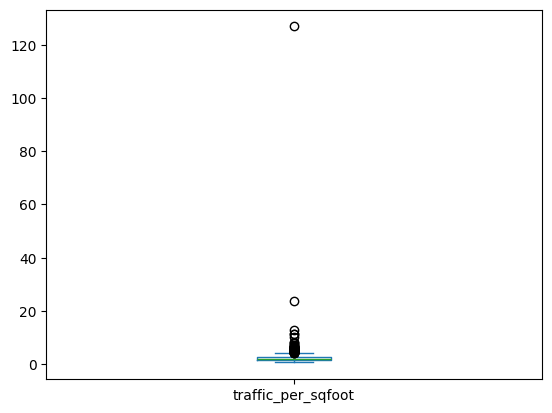

In [138]:
for feat in df.columns:
  if feat not in no_features:
    df[feat].plot(kind='box')
    plt.show()

In [139]:
df[df['sales_per_sqfoot'] > 77]

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales,Store_Size,sales_per_sqfoot,sales_per_csutomer,traffic_per_sqfoot
339,340,966,1172,900,85470,small,88.478261,94.966667,1.073333
406,407,896,1059,870,75110,small,83.828125,86.333333,1.029885
408,409,1303,1587,1310,102310,medium,78.518803,78.099237,0.994656
421,422,1175,1405,810,91200,small,77.617021,112.592593,1.450617
468,469,1060,1279,670,97360,small,91.849057,145.313433,1.582090
556,557,932,1138,820,89760,small,96.309013,109.463415,1.136585
557,558,1137,1374,700,101780,small,89.516271,145.400000,1.624286
604,605,1078,1306,680,84360,small,78.256030,124.058824,1.585294
689,690,1078,1276,640,94370,small,87.541744,147.453125,1.684375
744,745,854,1018,660,77740,small,91.030445,117.787879,1.293939


In [114]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales', 'Store_Size', 'sales_per_sqfoot', 'sales_per_csutomer',
       'traffic_per_sqfoot'],
      dtype='object')

In [140]:
df.rename(columns={'sales_per_csutomer':'sales_per_customer'}, inplace=True)

In [141]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales', 'Store_Size', 'sales_per_sqfoot', 'sales_per_customer',
       'traffic_per_sqfoot'],
      dtype='object')